# 绘制一个圆
圆的方程如下：
$$x^2+y^2=4$$

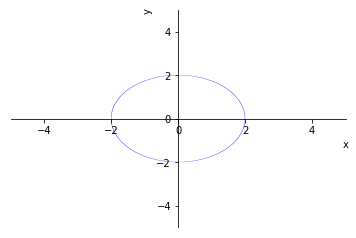

In [4]:
from sympy import *

x, y = symbols('x y')
eq = Eq(x**2 + y**2, 4)
plot_implicit(eq)

这是一个圆么？仔细看刻度，都是2，的确符合圆的特征。在 SymPy 中，x轴和y轴的比例不一样，这一点实在糟心。不过，我们可以通过自定义的比例，让其显示为一个完美的圆。

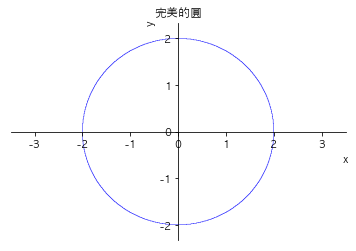

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'AppleGothic']
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
ratio = plt.rcParams['figure.figsize'][1] / plt.rcParams['figure.figsize'][0]
from sympy import *

x, y = symbols('x y')
eq = Eq(x**2 + y**2, 4)
p = plot_implicit(eq, show=False)

p.title = '完美的圓'

p.xlim = (-3.5, 3.5)
p.ylim = (p.xlim[0] * ratio, p.xlim[1] * ratio)

p.show()

如果你使用过 NumPy 绘图，那么这种方法你一定很熟悉。

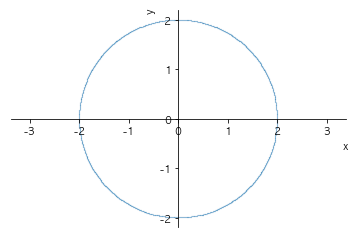

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *


x, y = symbols('x y')
eq = Eq(x ** 2 + y ** 2, 4)
p = plot_implicit(eq, show=False)

xy, action = p[0].get_points()  # get ImplicitSeries

x = [x[0].mid for x in xy]
y = [y[1].mid for y in xy]

plt.xlabel('x').set_position((1, 0))
plt.ylabel('y').set_position((0, 1))

# 设置坐标轴刻度
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-4, 4, 9))
# 获取当前的坐标轴, gca = get current axis
ax = plt.gca()

# 设置右边框和上边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 设置x坐标轴为下边框，y坐标轴为左边框
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# 设置x轴, y周在(0, 0)的位置
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))


plt.axis('equal')
plt.scatter(x, y, 0.01)
plt.show()

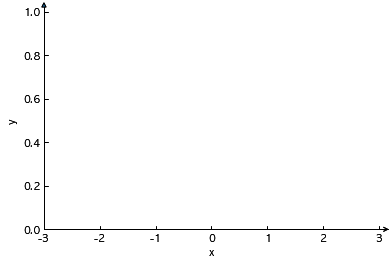

In [162]:
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
import numpy as np

fig = plt.figure()
ax = axisartist.Subplot(fig, 111)

fig.add_axes(ax)

ax.axis['top'].set_visible(False)
ax.axis['right'].set_visible(False)
ax.axis['bottom'].set_axisline_style('->')
ax.axis['left'].set_axisline_style('-|>')


ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(-3, 3)

plt.show()

这里只能用scatter绘制散点图，否则就会出现下面的效果：

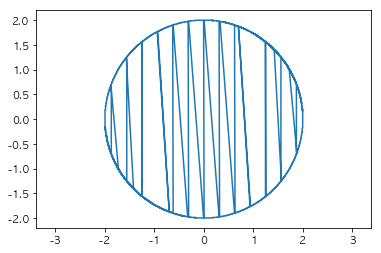

In [12]:
import matplotlib.pyplot as plt
from sympy import *

x, y = symbols('x y')
eq = Eq(x ** 2 + y ** 2, 4)
p = plot_implicit(eq, show=False)

xy, action = p[0].get_points()  # get ImplicitSeries

x = [x[0].mid for x in xy]
y = [y[1].mid for y in xy]

plt.axis('equal')
plt.plot(x, y)
plt.show()

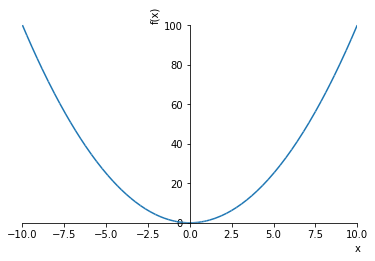

In [1]:
from sympy import *

x = symbols('x')
plotting.plot(x**2)

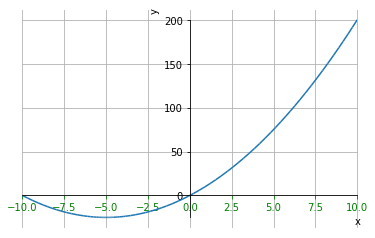

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['axes.grid']= True 

from sympy import *
x = symbols('x')
plotting.plot(x**2 + 10*x, ylabel='y')

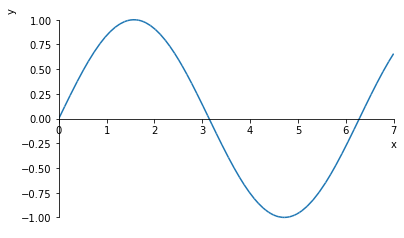

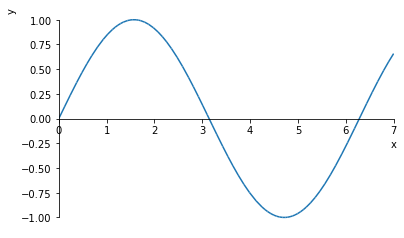

In [16]:
from sympy import sin
from sympy import symbols
from sympy.plotting import plot

x = symbols('x')
y = sin(x)

p1=plot(y,(x,0,7),ylabel="y")
fig = p1._backend.fig
ax = p1._backend.ax

ax.axis('equal')
p1.show()

cartesian line: x**2 for x over (-2.0, 2.0)
cartesian line: x**3 for x over (-2.0, 2.0)


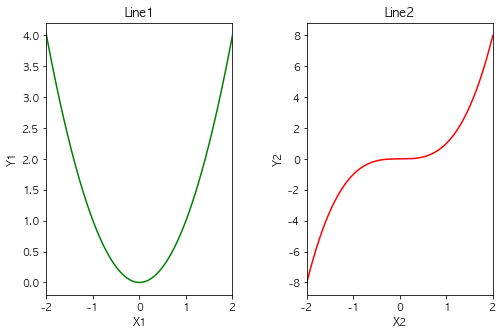

In [31]:
import matplotlib.pyplot as plt
from sympy import symbols
import numpy as np

from sympy import symbols
from sympy.plotting import plot

# part 1
# uses symbolic plot of functions
x = symbols('x')

#p1, p2 = plot(x**2, x**3, (x, -2, 2))

# this plot will not show ...
# only produce 2 curves
p1, p2 = plot((x**2, (x, -2, 2)), \
                (x**3, (x, -2, 2)), \
                show=False)
# collect (x,y)'s of the unseen curves 
x1y1 = p1.get_points()  # array of 2D
x2y2 = p2.get_points() 

# part 2
# uses regular matplotlib to plot the data

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# do subplot 1 
ax1.plot(x1y1[0], x1y1[1], 'g')  # plot x**2 in green
ax1.set_xlim([-2, 2])
ax1.set_xlabel('X1')
ax1.set_ylabel('Y1')
ax1.set_title('Line1')  # destroyed by another .title(); axis metho1

# do subplot 2
ax2.plot(x2y2[0], x2y2[1], 'r')  # plot x**3 in red
ax2.set_xlim([-2, 2])
ax2.set_xlabel('X2')
ax2.set_ylabel('Y2')
ax2.set_title('Line2')

fig.subplots_adjust(wspace=0.4) # set space between subplots

plt.show()

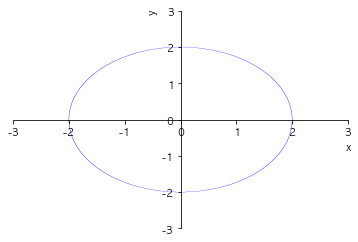

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sympy import *

x, y = symbols("x y")
hp = plot_implicit(Eq(x**2 + y**2, 4), (x, -3, 3), (y, -3, 3))
fig = hp._backend.fig
ax = hp._backend.ax
xx = yy = np.linspace(-3,3)
ax.plot(xx,yy) # y = x
ax.plot([0],[0],'o') # Point (0,0)
ax.set_aspect('equal','datalim')
fig.canvas.draw()

In [163]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)
xx,yy = np.linspace(-3,3), np.linspace(-3,3)
x,y = np.meshgrid(xx,yy)
ax.contour(x, y, (x**2+y**2-4), [0]);
ax.plot([0],[0],"o")
ax.plot(xx,yy)
ax.set_aspect('equal','datalim')

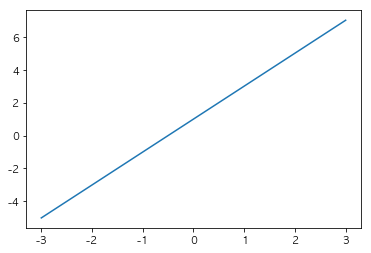

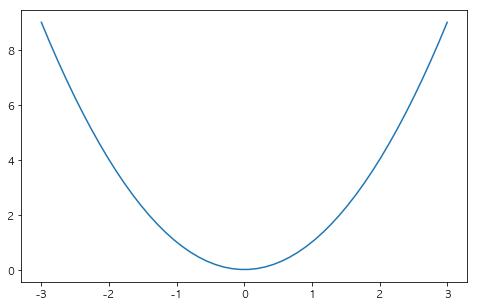

In [169]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)
y1 = 2*x+1
y2 = x**2

plt.figure()
plt.plot(x, y1)

plt.figure(num=3, figsize=(8, 5))
plt.plot(x, y2)

plt.show()